In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
from matplotlib.colors import ListedColormap

In [3]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

Before classification task, we should implement the Adaline algorithm. To this end, in the following code cell, we have a stub of the class AdalineGD. 
Our final goal is to complete the code of the class by filling the missing parts. Missing parts are highlighted as comments which contain suggestions for correctly coding the right statement.

In [4]:
x = np.array([1,2,3])
y = np.array([4,5,6])
M1 = np.array([[1,2,3],[4,5,6],[7,8,9]]) # M1 is 3x3
M2 = np.array([[1,2],[4,5],[7,8]]) # M2 is 3x2

In [5]:
x + y

array([5, 7, 9])

In [6]:
x @ M1

array([30, 36, 42])

In [7]:
M1 @ x

array([14, 32, 50])

In [8]:
M1 @ M2

array([[ 30,  36],
       [ 66,  81],
       [102, 126]])

In [9]:
5 * y

array([20, 25, 30])

In [10]:
M2.T

array([[1, 4, 7],
       [2, 5, 8]])

In [11]:
np.dot(x, y)

32

In [12]:
M1.dot(y)

array([ 32,  77, 122])

For implementing Adaline, we have two options: Gradient Descent with extension or Gradient descent with matrix formulation.



In [19]:
class AdalineGD:
     """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      number of epochs.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
     
     def __init__(self, eta=0.01, epochs=50, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state
         
     def net_input(self, X):
         """Calculate net input"""
         return X.dot(self.w_) + self.b_ # Xw + b
     
     def activation(self, X):
         """Compute linear activation"""
         return X
         
     def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        # weights and bias initialization
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        # Approach 1 - matrix formulation
        for i in range(self.epochs): 
            net_input = self.net_input(X)
            output = self.activation(net_input) # phi(Xw+b) = Xw + b
            errors = y - output # definition of e
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0] # updating rules for all weights
            self.b_ += self.eta * errors.mean() # updating the rule
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
        
        # Approach 2 - extended learning algorithm with eta
        """
        for i in range(self.epochs): # for each epoch
            net_input = self.net_input(X)
            output = # phi(Xw + b) = Xw + b
            errors = # definition of e
            for j in range(self.w_.shape[0]): # for j in [1, ..., m]
                self.w_[j] + = # updating rule for a single weight
            self.b_ += # updatig rule for bias
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
        """
         
     def predict(self, X):
         """Return class label after unit step"""
         return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
     

### Testing the code

Now we shall test the implementation to see if it's correct. We use the Iris dataset as testbed.

In [20]:
iris = pd.read_csv('data/iris.data', header=None)
iris_small = iris[iris[4].isin(['Iris-setosa', 'Iris-versicolor'])]
iris_small.loc[:, (4, )] = iris_small[4].map({'Iris-setosa': 0, 'Iris-versicolor':1})
X, y = iris_small[[0, 2]], iris_small[4]

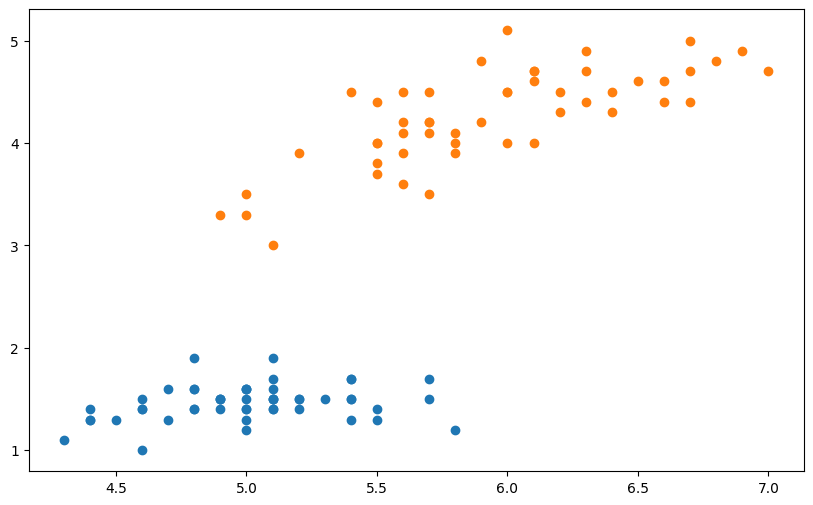

In [21]:
fig_iris = plt.figure(figsize=(10, 6))
ax = fig_iris.add_subplot()
label_0 = (y == 0)
label_1 = (y == 1)
ax.scatter(X.loc[label_0, 0], X.loc[label_0, 2])
ax.scatter(X.loc[label_1, 0], X.loc[label_1, 2])

In [22]:
ada_cls = AdalineGD(eta=0.01, epochs=30).fit(X, y)

And now we plot the line separating the two classes.

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
/var/folders/by/pqh4gvw52t5fm7pvbqnvcyy00000gn/T/ipykernel_40168/922554207.py:5: SyntaxWarning: invalid escape sequence '\e'
  ax.plot(range(1,51), ada_cls.losses_, label = f'$\eta$={eta}', marker='o')


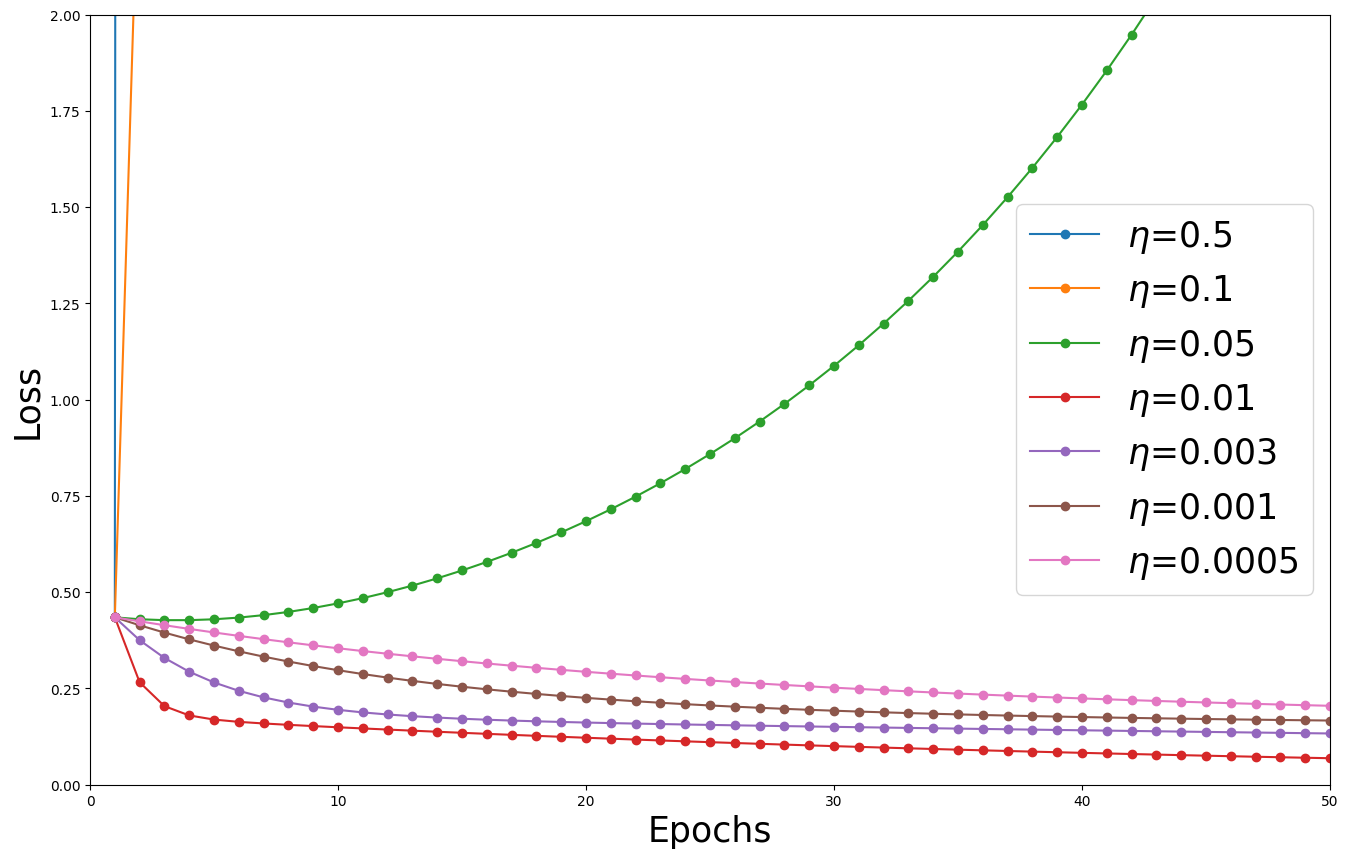

In [32]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot()
for eta in [0.5, 0.1, 0.05, 0.01, 0.003, 0.001, 0.0005]:
    ada_cls = AdalineGD(epochs=50, eta=eta).fit(X, y)
    ax.plot(range(1,51), ada_cls.losses_, label = f'$\eta$={eta}', marker='o')
ax.set_ylim((0,2))
ax.set_xlim((0,50))
ax.set_xlabel('Epochs',size=25)
ax.set_ylabel('Loss',size=25)
ax.legend(fontsize = 25)

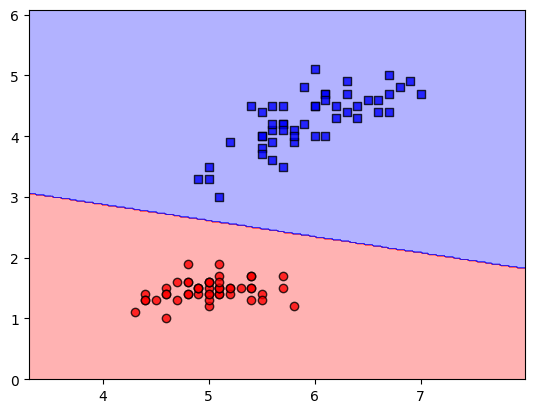

In [23]:
plot_decision_regions(X.values, y.values, classifier=ada_cls)

### Image classification (Halloween version)



In [24]:
with open('data/halloween.npy', 'rb') as f:
    dataset = np.load(f)
    labels = np.load(f)

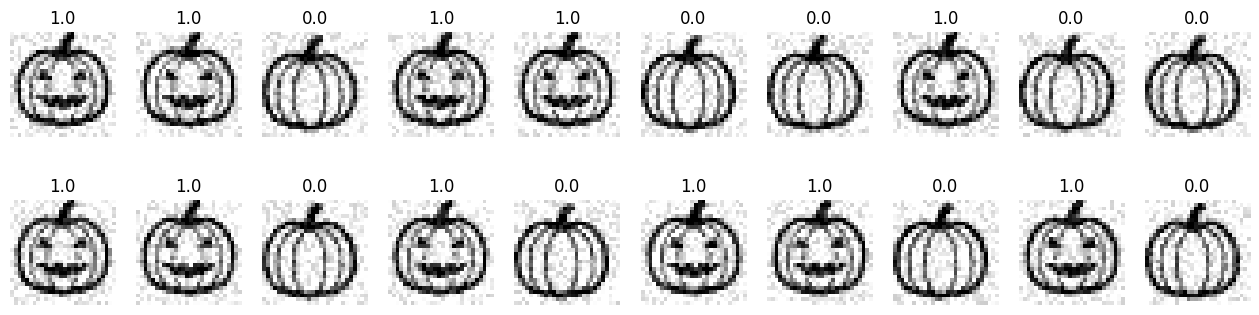

In [25]:
fig_sample = plt.figure(figsize=(16, 4))
for i in range(20):
    ax = fig_sample.add_subplot(2, 10, i+1)
    ax.imshow(Image.fromarray(dataset[i]))
    ax.set_title(labels[i])
    plt.axis('off')

In [26]:
dataset = dataset.reshape(dataset.shape[0], 28*28)
dataset = dataset / 255

In [27]:
dataset.min(), dataset.max()

(0.0, 1.0)

In [28]:
ada_cls_p = AdalineGD(eta=0.001, epochs=30).fit(dataset, labels)

In [29]:
y_predicted = ada_cls_p.predict(dataset)
y_predicted.shape

(1000,)

In [30]:
np.sum(labels == y_predicted) / dataset.shape[0]

1.0

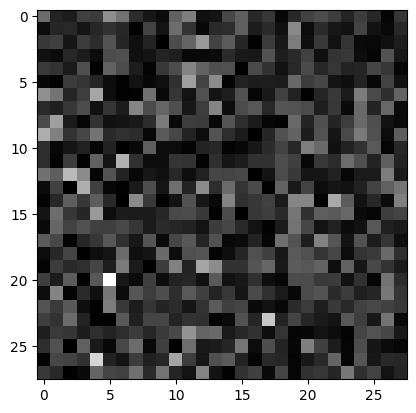

In [31]:
fil = np.abs(ada_cls_p.w_.reshape(28, 28))
fil_max, fil_min = fil.max(), fil.min()
fil_scaled = np.around((fil - fil_min) / (fil_max - fil_min) * 255)
plt.imshow(Image.fromarray(fil_scaled))